In [ ]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling1D, Activation, ReLU,Convolution1D,Convolution1DTranspose,Lambda,Conv1D,Reshape,Dropout
from tensorflow.keras.layers import BatchNormalization, Conv1DTranspose, Concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow import convert_to_tensor
from sklearn.decomposition import PCA

In [ ]:
!wget -q --show-progress --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1e27X7344PjW366tA6EtGWasJYZvf4MQc' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=iD" -O MARIDA.zip && rm -rf /tmp/cookies.txt
from google.colab import drive
drive.mount('/content/drive')
# Set folder path

folder_path = "/content/drive/MyDrive/Colab Notebooks/DL project/data"

# List folder contents
import os
os.listdir(folder_path)

!cd "/content/drive/MyDrive/Colab Notebooks/DL project/data"
import pandas as pd
#Spectral signature extraction
hdf = pd.HDFStore("/content/drive/MyDrive/Colab Notebooks/DL project/data/dataset.h5", mode = "r")
#Slitting into train, val and test datasets
df_train = hdf.select('train')
df_val = hdf.select('val')
df_test = hdf.select('test')
print(hdf.keys())
hdf.close()

Mounted at /content/drive
['/test', '/train', '/val']


In [ ]:
import pandas as pd

# Map class names to class numbers
class_dict = {
    "Wakes": 0,
    "Marine Water": 1,
    "Ship": 2,
    "Marine Debris": 3,
    "Shallow Water": 4,
    "Natural Organic Material": 5,
    "Turbid Water": 6,
    "Sparse Sargassum": 7,
    "Foam": 8,
    "Mixed Water": 9,
    "Sediment-Laden Water": 10,
    "Clouds": 11,
    "Cloud Shadows": 12,
    "Dense Sargassum": 13,
    "Waves": 14
}
df_train_classes=df_train.iloc[:,12] #exctracting classes names


# Print the resulting dataframe
#print(df_train)


In [ ]:
df_train=df_train.iloc[:,0:11] #extracting pixels information

# Add a column with the corresponding class numbers to df_train
df_train["Class_Num"] = df_train_classes.map(class_dict)
# Print the resulting dataframe
print(df_train)

           nm440     nm490     nm560     nm665     nm705     nm740     nm783  \
0       0.102549  0.099589  0.083065  0.060977  0.054536  0.056019  0.058678   
1       0.102549  0.102169  0.085815  0.064754  0.054536  0.056019  0.058678   
2       0.101787  0.103341  0.085705  0.068320  0.054536  0.055916  0.059498   
3       0.101787  0.101699  0.085045  0.063495  0.054328  0.051480  0.052932   
4       0.101787  0.100058  0.087575  0.065488  0.054536  0.055916  0.059498   
...          ...       ...       ...       ...       ...       ...       ...   
429407  0.062488  0.058247  0.045015  0.034692  0.030850  0.030421  0.033822   
429408  0.062488  0.058247  0.040610  0.034902  0.030850  0.030421  0.033822   
429409  0.062488  0.059892  0.044465  0.034167  0.030746  0.030731  0.033924   
429410  0.062488  0.057660  0.043143  0.034692  0.030746  0.030731  0.033924   
429411  0.062488  0.059187  0.043033  0.031333  0.029706  0.029595  0.031461   

           nm842     nm865    nm1600   

In [ ]:
#Validation set

df_val_classes=df_val.iloc[:,12] #exctracting classes names

In [ ]:
#Validation set

df_val=df_val.iloc[:,0:11] #extracting pixels information

# Add a column with the corresponding class numbers to df_val
df_val["Class_Num"] = df_val_classes.map(class_dict)
# Print the resulting dataframe
print(df_val)

           nm440     nm490     nm560     nm665     nm705     nm740     nm783  \
0       0.055481  0.049914  0.041615  0.035932  0.030630  0.030655  0.034099   
1       0.055481  0.056589  0.042165  0.032787  0.029487  0.030140  0.034099   
2       0.056749  0.061858  0.052387  0.039915  0.032708  0.033234  0.035740   
3       0.055481  0.065840  0.052167  0.036665  0.030526  0.030449  0.032252   
4       0.060424  0.064786  0.052717  0.040544  0.034267  0.033028  0.036253   
...          ...       ...       ...       ...       ...       ...       ...   
213097  0.065147  0.056678  0.040299  0.038716  0.035129  0.036097  0.038700   
213098  0.065147  0.054200  0.040630  0.038821  0.035129  0.036097  0.038700   
213099  0.065147  0.058448  0.042949  0.041028  0.034609  0.034443  0.037056   
213100  0.065147  0.058802  0.043833  0.040397  0.034609  0.034443  0.037056   
213101  0.064506  0.058566  0.040851  0.039136  0.032943  0.034960  0.035824   

           nm842     nm865    nm1600   

In [ ]:
#Test set

df_test_classes=df_test.iloc[:,12] #exctracting classes names


In [ ]:
#Test set

df_test=df_test.iloc[:,0:11] #extracting pixels information

# Add a column with the corresponding class numbers to df_test
df_test["Class_Num"] = df_test_classes.map(class_dict)
# Print the resulting dataframe
print(df_test)

           nm440     nm490     nm560     nm665     nm705     nm740     nm783  \
0       0.026860  0.023231  0.012851  0.007386  0.005664  0.004713  0.004983   
1       0.026860  0.022393  0.012962  0.006331  0.005559  0.005542  0.005703   
2       0.026860  0.022393  0.013853  0.006647  0.005559  0.005542  0.005703   
3       0.026729  0.021077  0.012294  0.006225  0.004514  0.004506  0.005086   
4       0.026729  0.021795  0.012962  0.006858  0.004514  0.004506  0.005086   
...          ...       ...       ...       ...       ...       ...       ...   
194858  0.058966  0.055173  0.038499  0.029029  0.024716  0.025710  0.028051   
194859  0.058966  0.058932  0.043786  0.031758  0.026692  0.025813  0.029797   
194860  0.058966  0.055055  0.036626  0.027246  0.026692  0.025813  0.029797   
194861  0.051325  0.045773  0.038719  0.035430  0.027004  0.030975  0.033698   
194862  0.053363  0.047066  0.031339  0.024727  0.021805  0.020652  0.022200   

           nm842     nm865    nm1600   

In [ ]:
import numpy as np
train_data = df_train.iloc[:, :-1] # extract input features from df_train
train_labels = df_train.iloc[:, -1] # extract target labels from df_train


print(train_data.shape)
print(train_labels.shape)

(429412, 11)
(429412,)


In [ ]:
val_data = df_val.iloc[:, :-1] # extract input features from df_val
val_labels = df_val.iloc[:, -1] # extract target labels from df_val

print(train_data.shape)
print(train_labels.shape)
print(val_data.shape)
print(val_labels.shape)

(429412, 11)
(429412,)
(213102, 11)
(213102,)


In [ ]:
test_data = df_test.iloc[:, :-1] # extract input features from df_test
test_labels = df_test.iloc[:, -1] # extract target labels from df_test

In [ ]:
#PC of the train data
pca = PCA(n_components=1)
pca_result = pca.fit_transform(train_data)


print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.96357005]


In [ ]:
#PC of the test data
pca_test = PCA(n_components=1)
pca_test_result = pca_test.fit_transform(test_data)


print('Explained variation per principal component: {}'.format(pca_test.explained_variance_ratio_))

Explained variation per principal component: [0.82570535]


In [ ]:

from sklearn.neighbors import KNeighborsClassifier

# Train the kNN classifier. 

print(pca_result.shape)
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(pca_result,train_labels)


(429412, 1)


KNeighborsClassifier()

In [ ]:
#Evaluate the classifier
score = classifier.score(pca_test_result,test_labels)

print(" k=%d and the accuracy is %.2f%",5,score*100)

 k=%d and the accuracy is %.2f% 5 52.99158896250186


In [ ]:
y_pred=classifier.predict(pca_test_result)
print(y_pred)
print(test_labels)

[1 1 1 ... 0 1 6]
0         1
1         1
2         1
3         1
4         1
         ..
194858    0
194859    0
194860    0
194861    3
194862    1
Name: Class_Num, Length: 194863, dtype: int64


In [ ]:
#PC of the validation data
pca_val = PCA(n_components=1)
pca_val_result = pca_val.fit_transform(val_data)

#test_data['pca-one'] = pca_test_result[:,0]
#test_data['pca-two'] = pca_test_result[:,1]

print('Explained variation per principal component: {}'.format(pca_val.explained_variance_ratio_))

Explained variation per principal component: [0.80835951]


In [ ]:
#Fully connected NN
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(1024,input_shape=(429412, 1),activation="relu"))
model.add(Dense(500,activation="relu"))
model.add(Dense(300,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(56,activation="relu"))
model.add(Dense(15,activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics="accuracy")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 429412, 1024)      2048      
                                                                 
 dense_1 (Dense)             (None, 429412, 500)       512500    
                                                                 
 dense_2 (Dense)             (None, 429412, 300)       150300    
                                                                 
 dense_3 (Dense)             (None, 429412, 256)       77056     
                                                                 
 dense_4 (Dense)             (None, 429412, 150)       38550     
                                                                 
 dense_5 (Dense)             (None, 429412, 100)       15100     
                                                                 
 dense_6 (Dense)             (None, 429412, 56)        5

Epoch 1/10


13419/13420 [============================>.] - ETA: 0s - loss: 0.8618 - accuracy: 0.7272

13420/13420 [==============================] - 291s 22ms/step - loss: 0.8618 - accuracy: 0.7272 - val_loss: 0.7053 - val_accuracy: 0.7913
Epoch 2/10
13420/13420 [==============================] - 279s 21ms/step - loss: 0.8329 - accuracy: 0.7360 - val_loss: 0.7107 - val_accuracy: 0.8039
Epoch 3/10
13420/13420 [==============================] - 286s 21ms/step - loss: 0.8220 - accuracy: 0.7377 - val_loss: 0.7572 - val_accuracy: 0.8034
Epoch 4/10
13420/13420 [==============================] - 283s 21ms/step - loss: 0.8145 - accuracy: 0.7392 - val_loss: 0.7205 - val_accuracy: 0.8035
Epoch 5/10
13420/13420 [==============================] - 273s 20ms/step - loss: 0.8121 - accuracy: 0.7399 - val_loss: 0.7471 - val_accuracy: 0.7992
Epoch 6/10
13420/13420 [==============================] - 271s 20ms/step - loss: 0.8078 - accuracy: 0.7404 - val_loss: 0.7668 - val_accuracy: 0.7951
Epoch 7/10
13420/13420 [==============================] - 283s 21ms/step - loss: 0.8052 - accuracy: 0.7409 - val_loss

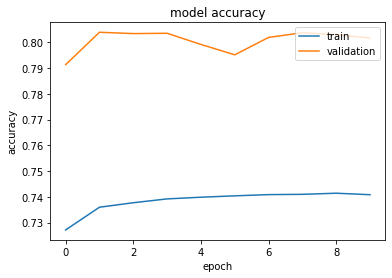

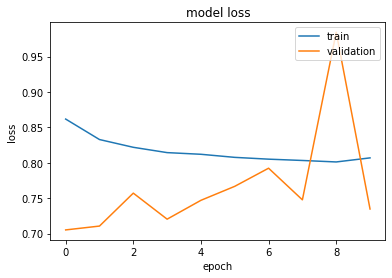

In [ ]:
#Train the FCNN
import matplotlib.pyplot as plt


history=model.fit(pca_result,train_labels,batch_size=32,epochs=10,validation_data=(pca_val_result,val_labels))

loss,acc=model.evaluate(pca_test_result,test_labels)

print("loss : ", loss)
print("acc : ", acc)


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')

plt.show()
